### Step 1: Introduction

In [1]:
# The Customer Support Ticket Dataset is a dataset that includes customer support tickets for various tech products. 
# It consists of customer inquiries related to hardware issues, software bugs, network problems, account access, data loss, and other support topics. 
# The dataset provides information about the customer, the product purchased, the ticket type, the ticket channel, the ticket status, and other relevant details.


# This dataset was selected to perform Exploratory Data Analysis (EDA), identify trends/patterns, and spot common issues. 
# Features Description:
# • Ticket ID: A unique identifier for each ticket.
# • Customer Name: The name of the customer who raised the ticket.
# • Customer Email: The email address of the customer (Domain name - @example.com is intentional for user data privacy concern).
# • Customer Age: The age of the customer.
# • Customer Gender: The gender of the customer.
# • Product Purchased: The tech product purchased by the customer.
# • Date of Purchase: The date when the product was purchased.
# • Ticket Type: The type of ticket (e.g., technical issue, billing inquiry, product inquiry).
# • Ticket Subject: The subject/topic of the ticket.
# • Ticket Description: The description of the customer's issue or inquiry.
# • Ticket Status: The status of the ticket (e.g., open, closed, pending customer response).
# • Resolution: The resolution or solution provided for closed tickets.
# • Ticket Priority: The priority level assigned to the ticket (e.g., low, medium, high, critical).
# • Ticket Channel: The channel through which the ticket was raised (e.g., email, phone, chat, social media).
# • First Response Time: The time taken to provide the first response to the customer.
# • Time to Resolution: The time taken to resolve the ticket.
# • Customer Satisfaction Rating: The customer's satisfaction rating for closed tickets (on a scale of 1 to 5).

# Dataset source - Kaggle:
# https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset/

### Step 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

### Step 3: Reading Dataset

In [3]:
data = pd.read_csv('customer_support_ticket.csv')

In [4]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
data.tail()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


In [6]:
data.shape

(8469, 17)

In [7]:
# The dataset has 8469 rows and 17 columns.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [9]:
# The variables "Resolution, First Response Time, Time to Resolution, Customer Satisfaction Rating" have missing values.
# The variables "Ticket ID, Customer Age" are of datatype int64, variable "Customer Satisfaction Rating" is float64.
# All the other varaibles are of datatype object.

#### Check for Unique and Duplicated Values

In [10]:
data.nunique()

Ticket ID                       8469
Customer Name                   8028
Customer Email                  8320
Customer Age                      53
Customer Gender                    3
Product Purchased                 42
Date of Purchase                 730
Ticket Type                        5
Ticket Subject                    16
Ticket Description              8077
Ticket Status                      3
Resolution                      2769
Ticket Priority                    4
Ticket Channel                     4
First Response Time             5470
Time to Resolution              2728
Customer Satisfaction Rating       5
dtype: int64

In [11]:
# "Customer Gender" has distinct 3 values.
# There are 42 different products, according to "Product Purchased".
# There are 8077 different "Ticket Description" values. It will be hard to analyse it.
# There are 4 different "Ticket Priority" values and 5 different "Customer Satisfaction Rating".

In [12]:
data.duplicated().sum()

0

In [13]:
# There are not duplicated entries / rows.

#### Missing Values

In [14]:
data.isnull().sum().sort_values(ascending=0)

Customer Satisfaction Rating    5700
Time to Resolution              5700
Resolution                      5700
First Response Time             2819
Ticket Description                 0
Ticket Channel                     0
Ticket Priority                    0
Ticket Status                      0
Ticket ID                          0
Customer Name                      0
Ticket Type                        0
Date of Purchase                   0
Product Purchased                  0
Customer Gender                    0
Customer Age                       0
Customer Email                     0
Ticket Subject                     0
dtype: int64

In [15]:
# The number of missing values for the columns "Resolution, Time to Resolution, Customer Satisfaction Rating" is 5700 (out of 8469).
# For the column "First Response Time" is 2819 (out of 8469).

In [16]:
round((data.isnull().sum().sort_values(ascending=0) / (len(data))) * 100, 2)

Customer Satisfaction Rating    67.30
Time to Resolution              67.30
Resolution                      67.30
First Response Time             33.29
Ticket Description               0.00
Ticket Channel                   0.00
Ticket Priority                  0.00
Ticket Status                    0.00
Ticket ID                        0.00
Customer Name                    0.00
Ticket Type                      0.00
Date of Purchase                 0.00
Product Purchased                0.00
Customer Gender                  0.00
Customer Age                     0.00
Customer Email                   0.00
Ticket Subject                   0.00
dtype: float64

In [17]:
# The percentage of missing values for the columns "Resolution, Time to Resolution, Customer Satisfaction Rating" is ≈ 67%. 
# For the column "First Response Time" is ≈ 33%.

### Step 4: Data Reduction

In [18]:
# Delete the columns "Ticket ID, Customer Name, Customer Email, Date of Purchase, Ticket Description" as they do not add value to the analysis.
# Then, check the remaining data.

In [19]:
data = data.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Date of Purchase', 'Ticket Description'], axis=1)

In [20]:
data.head()

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,Technical issue,Product setup,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,42,Female,LG Smart TV,Technical issue,Peripheral compatibility,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,48,Other,Dell XPS,Technical issue,Network problem,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,Billing inquiry,Account access,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,Billing inquiry,Data loss,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Age                  8469 non-null   int64  
 1   Customer Gender               8469 non-null   object 
 2   Product Purchased             8469 non-null   object 
 3   Ticket Type                   8469 non-null   object 
 4   Ticket Subject                8469 non-null   object 
 5   Ticket Status                 8469 non-null   object 
 6   Resolution                    2769 non-null   object 
 7   Ticket Priority               8469 non-null   object 
 8   Ticket Channel                8469 non-null   object 
 9   First Response Time           5650 non-null   object 
 10  Time to Resolution            2769 non-null   object 
 11  Customer Satisfaction Rating  2769 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 794.1+ KB


### Step 5: Feature Engineering

#### Creating Features

In [22]:
# Create a new column called "Brand", extracting it from the "Product_Purchased" column, for the analytics.

In [23]:
data.rename(columns = {'Product Purchased':'Product_Purchased'}, inplace = True)

In [24]:
data['Brand'] = data.Product_Purchased.str.split().str.get(0)

In [25]:
# List all the column names and reposition the column "Brand" before "Product_Purchased".

In [26]:
list(data.columns)

['Customer Age',
 'Customer Gender',
 'Product_Purchased',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel',
 'First Response Time',
 'Time to Resolution',
 'Customer Satisfaction Rating',
 'Brand']

In [27]:
data = data.reindex(columns=['Customer Age','Customer Gender', 'Brand', 'Product_Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'])

In [28]:
# Replace 'NaN' values by 'None' in "Resolution" column.
# Create a new column called "Resolution_Outcome" to analyse the percentage of resolve cases.

In [29]:
data['Resolution'] = data['Resolution'].fillna('None')

In [30]:
answer = []
for i in data['Resolution']:
    if i == 'None':
        answer.append('No')
    else:
        answer.append('Yes')
        
data['Resolution_Outcome'] = answer

In [31]:
data.head()

,Customer Age,Customer Gender,Brand,Product_Purchased,Ticket Type,Ticket Subject,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Outcome
0,32,Other,GoPro,GoPro Hero,Technical issue,Product setup,Pending Customer Response,None,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,No
1,42,Female,LG,LG Smart TV,Technical issue,Peripheral compatibility,Pending Customer Response,None,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,No
2,48,Other,Dell,Dell XPS,Technical issue,Network problem,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Yes
3,27,Female,Microsoft,Microsoft Office,Billing inquiry,Account access,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Yes
4,67,Female,Autodesk,Autodesk AutoCAD,Billing inquiry,Data loss,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Yes


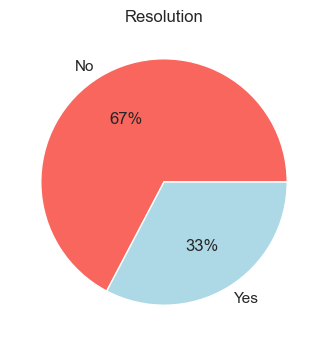

In [32]:
graph_resolution = data['Resolution_Outcome'].value_counts()
fig = plt.figure(figsize=(6,4))
plt.pie(graph_resolution, labels = graph_resolution.index, autopct = '%.0f%%', colors=['#f9665e', '#add8e6'])
plt.title('Resolution', loc = 'center', pad = 5, size = 12)
plt.show()

In [33]:
# The percentage of cases with resolution is 33%.
# From now onwards, we will focus the analysis only on the resolved cases and delete all the others.

### Step 6: Data Cleaning / Wrangling

In [34]:
# Delete 'Nan' values from columns "First Response Time, Time to Resolution", because we want to analyse resolved tickets only
# Delete 'Nan' values from columns "Customer Satisfaction Rating, Resolution", because we want to analyse resolved tickets only.
# Delete also "Ticket Status" column, because all the answers willbe "Closed" and will add no value to the analysis.
# In addition, reset the index and check the change.

In [35]:
data = data.drop(['Ticket Status', 'Resolution_Outcome'], axis=1)
data = data.dropna().reset_index(drop=True)

In [36]:
data.head()

,Customer Age,Customer Gender,Brand,Product_Purchased,Ticket Type,Ticket Subject,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,48,Other,Dell,Dell XPS,Technical issue,Network problem,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
1,27,Female,Microsoft,Microsoft Office,Billing inquiry,Account access,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
2,67,Female,Autodesk,Autodesk AutoCAD,Billing inquiry,Data loss,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
3,48,Male,Nintendo,Nintendo Switch,Cancellation request,Data loss,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
4,51,Male,Microsoft,Microsoft Xbox Controller,Product inquiry,Software bug,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Age                  2769 non-null   int64  
 1   Customer Gender               2769 non-null   object 
 2   Brand                         2769 non-null   object 
 3   Product_Purchased             2769 non-null   object 
 4   Ticket Type                   2769 non-null   object 
 5   Ticket Subject                2769 non-null   object 
 6   Resolution                    2769 non-null   object 
 7   Ticket Priority               2769 non-null   object 
 8   Ticket Channel                2769 non-null   object 
 9   First Response Time           2769 non-null   object 
 10  Time to Resolution            2769 non-null   object 
 11  Customer Satisfaction Rating  2769 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 259.7+ KB


In [38]:
# Substitute the blank spaces between words with "_"

In [39]:
data.rename(columns = {'Ticket Type':'Ticket_Type'}, inplace = True)
data.rename(columns = {'Ticket Subject':'Ticket_Subject'}, inplace = True)
data.rename(columns = {'Ticket Priority':'Ticket_Priority'}, inplace = True)
data.rename(columns = {'Ticket Channel':'Ticket_Channel'}, inplace = True)
data.rename(columns = {'Customer Age': 'Customer_Age'}, inplace = True)
data.rename(columns = {'Customer Gender': 'Customer_Gender'}, inplace = True)
data.rename(columns = {'Customer Satisfaction Rating': 'Customer_Satisfaction_Rating'}, inplace = True)

In [40]:
# Compare the unique values in each column to check if there are misspellings.
# Sort them by order for easier comparision.

In [41]:
print(sorted(data['Brand'].unique()))

['Adobe', 'Amazon', 'Apple', 'Asus', 'Autodesk', 'Bose', 'Canon', 'Dell', 'Dyson', 'Fitbit', 'Garmin', 'GoPro', 'Google', 'HP', 'LG', 'Lenovo', 'MacBook', 'Microsoft', 'Nest', 'Nikon', 'Nintendo', 'Philips', 'PlayStation', 'Roomba', 'Samsung', 'Sony', 'Xbox', 'iPhone']


In [42]:
print(sorted(data['Product_Purchased'].unique()))

['Adobe Photoshop', 'Amazon Echo', 'Amazon Kindle', 'Apple AirPods', 'Asus ROG', 'Autodesk AutoCAD', 'Bose QuietComfort', 'Bose SoundLink Speaker', 'Canon DSLR Camera', 'Canon EOS', 'Dell XPS', 'Dyson Vacuum Cleaner', 'Fitbit Charge', 'Fitbit Versa Smartwatch', 'Garmin Forerunner', 'GoPro Action Camera', 'GoPro Hero', 'Google Nest', 'Google Pixel', 'HP Pavilion', 'LG OLED', 'LG Smart TV', 'LG Washing Machine', 'Lenovo ThinkPad', 'MacBook Pro', 'Microsoft Office', 'Microsoft Surface', 'Microsoft Xbox Controller', 'Nest Thermostat', 'Nikon D', 'Nintendo Switch', 'Nintendo Switch Pro Controller', 'Philips Hue Lights', 'PlayStation', 'Roomba Robot Vacuum', 'Samsung Galaxy', 'Samsung Soundbar', 'Sony 4K HDR TV', 'Sony PlayStation', 'Sony Xperia', 'Xbox', 'iPhone']


In [43]:
print(sorted(data['Ticket_Subject'].unique()))

['Account access', 'Battery life', 'Cancellation request', 'Data loss', 'Delivery problem', 'Display issue', 'Hardware issue', 'Installation support', 'Network problem', 'Payment issue', 'Peripheral compatibility', 'Product compatibility', 'Product recommendation', 'Product setup', 'Refund request', 'Software bug']


In [44]:
print(sorted(data['Ticket_Type'].unique()))

['Billing inquiry', 'Cancellation request', 'Product inquiry', 'Refund request', 'Technical issue']


In [45]:
print(sorted(data['Ticket_Priority'].unique()))

['Critical', 'High', 'Low', 'Medium']


In [46]:
print(sorted(data['Ticket_Channel'].unique()))

['Chat', 'Email', 'Phone', 'Social media']


In [47]:
# There are not any data misspellings nor entry errors.

### Step 7: Statistics Summary

In [48]:
round(data.describe(),2)

,Customer_Age,Customer_Satisfaction_Rating
count,2769.00,2769.00
mean,44.33,2.99
std,15.20,1.41
min,18.00,1.00
25%,31.00,2.00
50%,45.00,3.00
75%,57.00,4.00
max,70.00,5.00


In [49]:
# From the statistics summary, we can infer the following:
  # "Customer Age" is on average 44 years old, the minimum is 18 and maximum is 70 years old.
  #  The average "Customer Satisfaction Rating" is 2.99, on a scale of 1 (minimum) to 5 (maximum).

In [50]:
# Provides a statistics summary of all data, including object.

In [51]:
round(data.describe(include='all'),2)

,Customer_Age,Customer_Gender,Brand,Product_Purchased,Ticket_Type,Ticket_Subject,Resolution,Ticket_Priority,Ticket_Channel,First Response Time,Time to Resolution,Customer_Satisfaction_Rating
count,2769.00,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769.00
unique,NaN,3,28,42,5,16,2769,4,4,2723,2728,NaN
top,NaN,Female,Sony,Canon EOS,Refund request,Network problem,Case maybe show recently my computer follow.,Critical,Email,2023-06-01 01:21:19,2023-06-01 17:14:42,NaN
freq,NaN,984,217,83,596,201,1,726,720,3,3,NaN
mean,44.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99
std,15.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.41
min,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
25%,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00
50%,45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00
75%,57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00


In [52]:
# Separate numerical from categorical data, in order to perform bivariate / multivariate analysis.

In [53]:
numerical_columns = data.select_dtypes(include=[np.number])
categorical_columns = data.select_dtypes(exclude=[np.number])

In [54]:
print("CATEGORICAL VARIABLES:")
print(categorical_columns)
print("NUMERICAL VARIABLES:")
print(numerical_columns)

CATEGORICAL VARIABLES:
     Customer_Gender        Brand          Product_Purchased  \
0              Other         Dell                   Dell XPS   
1             Female    Microsoft           Microsoft Office   
2             Female     Autodesk           Autodesk AutoCAD   
3               Male     Nintendo            Nintendo Switch   
4               Male    Microsoft  Microsoft Xbox Controller   
...              ...          ...                        ...   
2764          Female      MacBook                MacBook Pro   
2765           Other       iPhone                     iPhone   
2766           Other        Dyson       Dyson Vacuum Cleaner   
2767          Female        GoPro        GoPro Action Camera   
2768            Male  PlayStation                PlayStation   

               Ticket_Type            Ticket_Subject  \
0          Technical issue           Network problem   
1          Billing inquiry            Account access   
2          Billing inquiry              

num = data.select_dtypes()

### Step 8: EDA Univariate Analysis

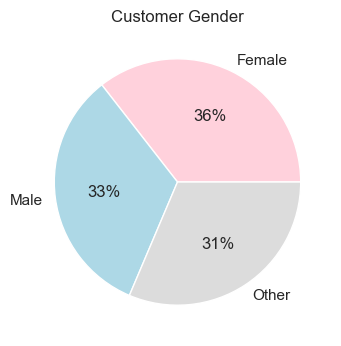

In [55]:
graph_gender = data['Customer_Gender'].value_counts()
plt.figure(figsize = (6,4))
plt.pie(graph_gender, labels = graph_gender.index, autopct='%.0f%%', colors=['#FFD1DC', '#add8e6', '#DCDCDC'])
plt.title('Customer Gender', loc = 'center', pad = 5, size = 12)
plt.show()

In [56]:
# The customer gender is quite balanced, as it is 36% Female and 33% Male.
# The percentage of "Other" is high and accounts for 31%.

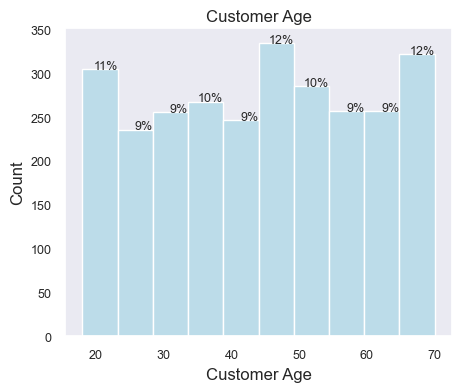

In [57]:
sns.set_theme(style='dark')
plt.figure(figsize = (5, 4))
total = float(len(data))
ax=sns.histplot(data=data, x='Customer_Age', bins=10, color='#add8e6')
plt.title('Customer Age', loc = 'center', pad = 5, size = 12)
plt.xlabel('Customer Age')
plt.tick_params(axis='both', labelsize=9)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), size=9, ha='right')
    
plt.show()

In [58]:
# The groups between 45-50 and 65-70 years old have the highest number of customers (12%), followed by 18-25 year old (11%).

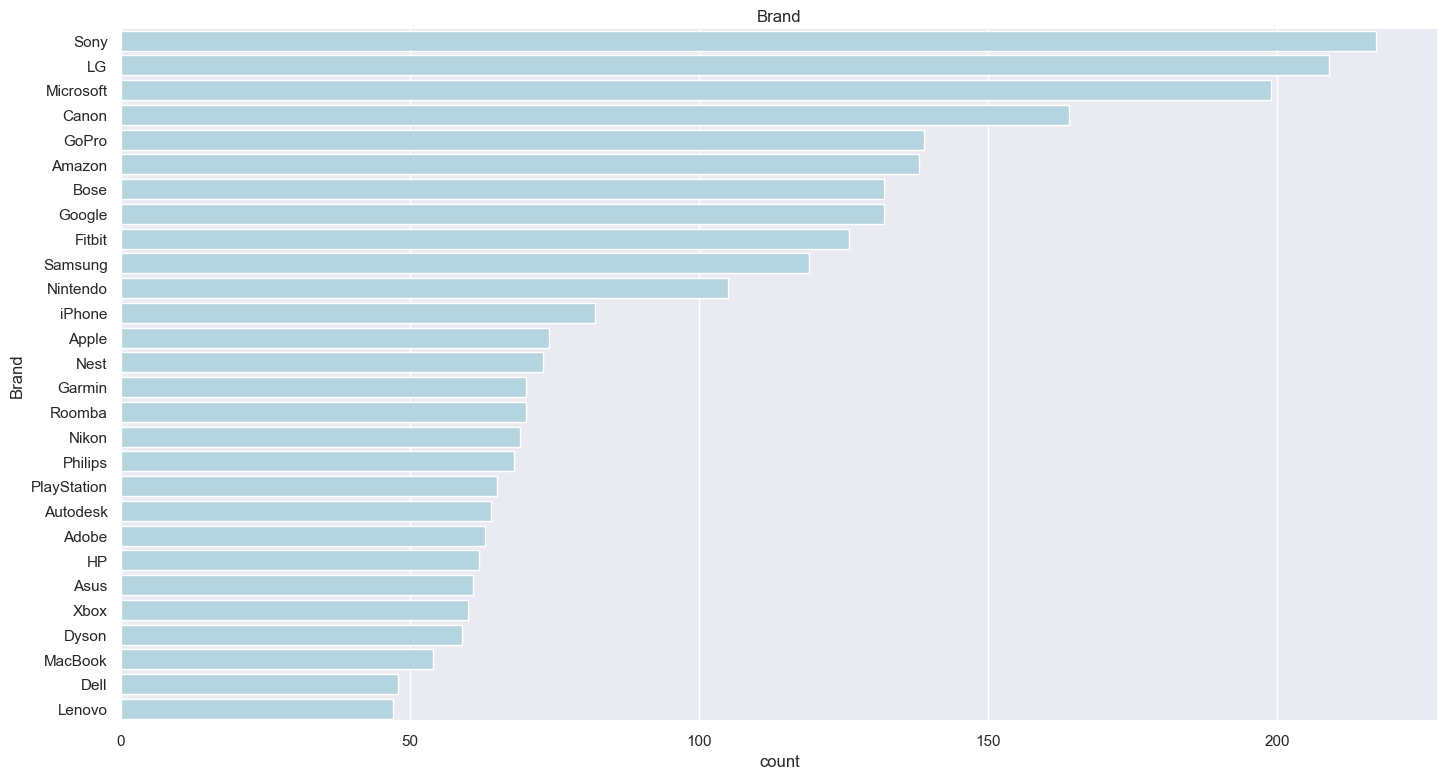

In [59]:
sns.set_theme(style='darkgrid')
plt.figure(figsize = (17, 9))
ax = sns.countplot(y='Brand', data=data, color = '#add8e6',order = data['Brand'].value_counts().index)
plt.title('Brand', loc = 'center', pad = 5, size = 12)
plt.show()

In [60]:
# The top 5 brands that generated more tickets are Sony, LG, Microsoft, Canon and GoPro, in desceding order.

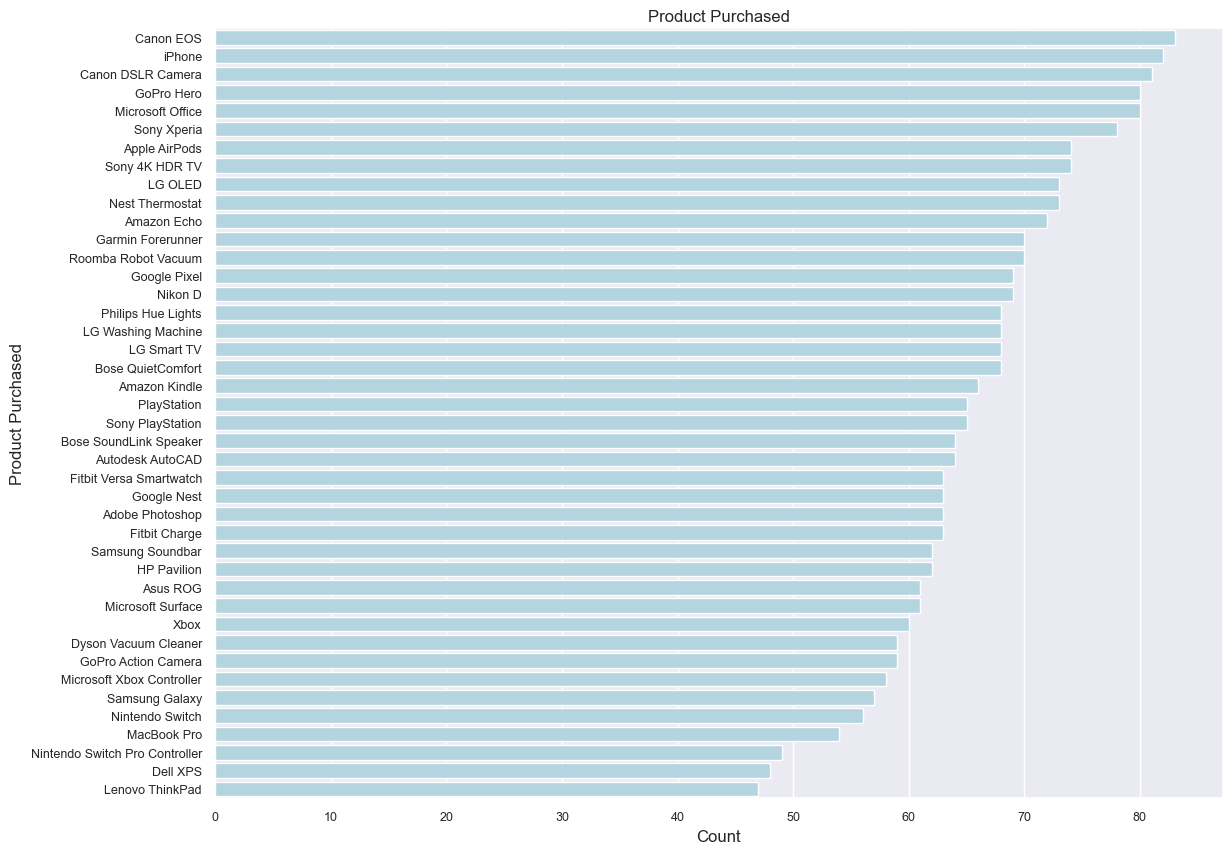

In [61]:
sns.set_theme(style='darkgrid')
plt.figure(figsize = (13, 10))
ax = sns.countplot(y='Product_Purchased', data=data, color = '#add8e6',order = data['Product_Purchased'].value_counts().index)
plt.title('Product Purchased', loc = 'center', pad = 5, size = 12)
plt.xlabel('Count')
plt.ylabel('Product Purchased')
plt.tick_params(axis='both', labelsize=9)
plt.show()

In [62]:
# The top 5 products that generated more tickets are Canon EOS, iPhone, Canon DSLR Camera, GoPro Hero and Microsoft Office, in desceding order.

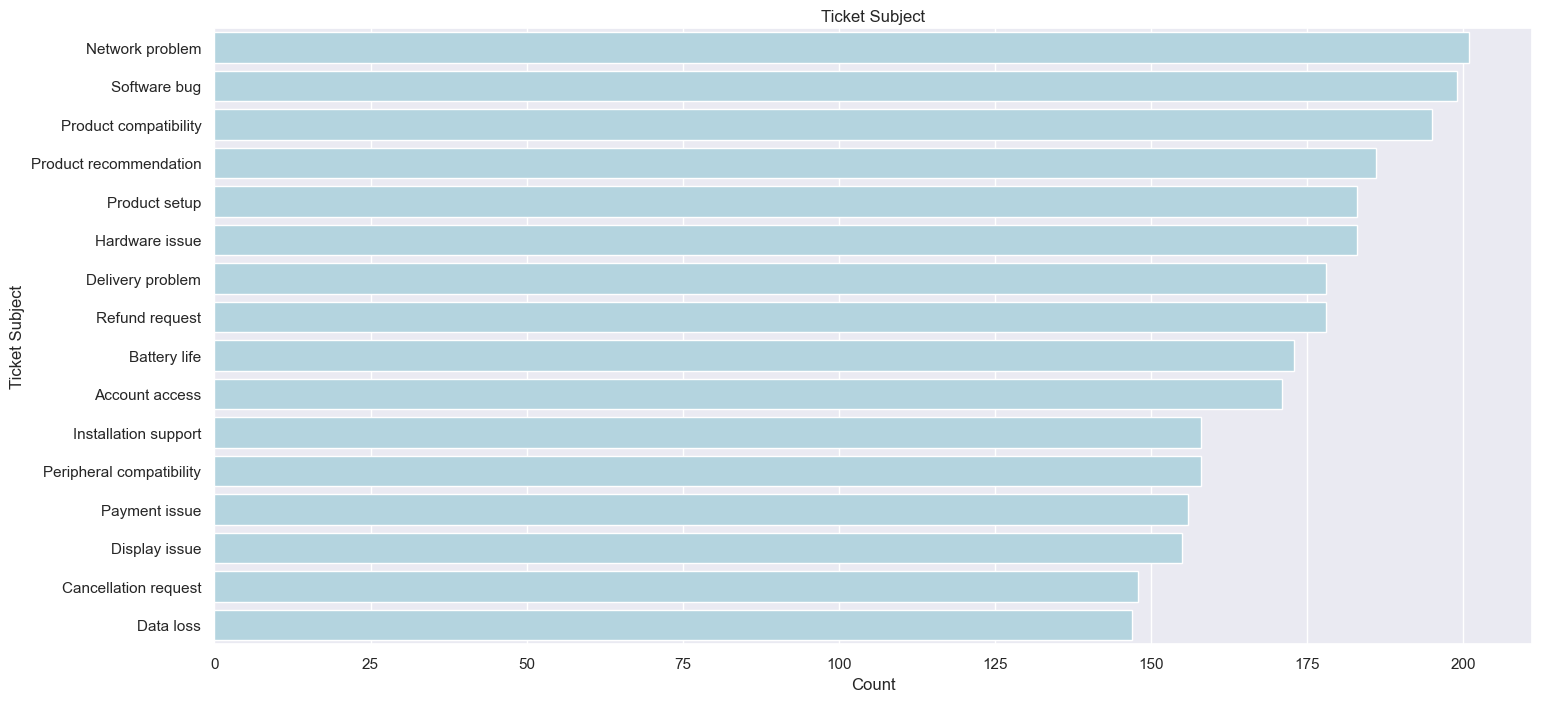

In [63]:
sns.set_theme(style='darkgrid')
plt.figure(figsize = (17, 8))
ax = sns.countplot(y='Ticket_Subject', data=data, color = '#add8e6',order = data['Ticket_Subject'].value_counts().index)
plt.title('Ticket Subject', loc = 'center', pad = 5, size = 12)
plt.xlabel('Count')
plt.ylabel('Ticket Subject')
plt.show()

In [64]:
# The top 5 subjects that generated more tickets are Network problem, Software bug, Product compatibility, Product recommendation and Product setup, in desceding order.

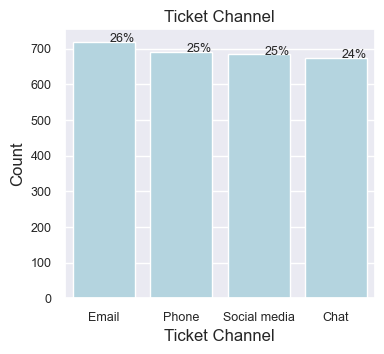

In [65]:
sns.set_theme(style='darkgrid')
plt.figure(figsize = (4, 3.5))
total = float(len(data))
ax = sns.countplot(x='Ticket_Channel', data=data, color = '#add8e6',order = data['Ticket_Channel'].value_counts().index)
plt.title('Ticket Channel', loc = 'center', pad =5, size = 12)
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.tick_params(axis='both', labelsize=9)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), size=9, ha='right')
plt.show()

In [66]:
# The most used channel for customer support is Email (26%).
# However the remaining channels are very similar, Phone, Social media (25%) and Chat (24%).   

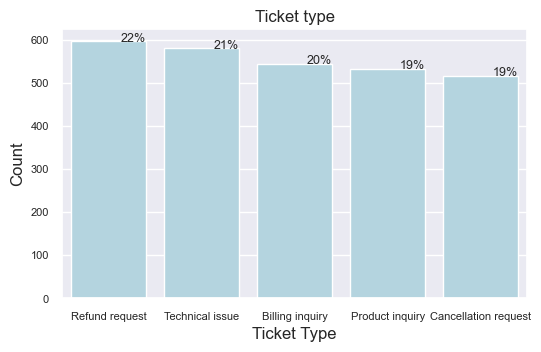

In [67]:
sns.set_theme(style='darkgrid')
plt.figure(figsize = (6, 3.5))
ax = sns.countplot(x='Ticket_Type', data=data, color = '#add8e6',order = data['Ticket_Type'].value_counts().index)
plt.title('Ticket type', loc = 'center', pad =5, size = 12)
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.tick_params(axis='both', labelsize=8)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=9, ha='right')
plt.show()

In [68]:
# The highest ticket type is Refund request (22%), similar to Technical issue (21%) and Billing inquiry (20%).

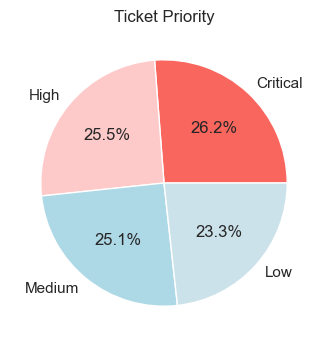

In [69]:
graph_priority = data['Ticket_Priority'].value_counts()
plt.figure(figsize = (6,4))
plt.pie(graph_priority, labels = graph_priority.index, autopct='%.1f%%', colors=['#f9665e', '#fec9c9', '#add8e6', '#cce2eb'])
plt.title('Ticket Priority', loc = 'center', pad = 5, size = 12)
plt.show()

In [70]:
# The highest ticket prority is Critical (26%), similar to High and Medium (25%).
# The lowest ticket prority is low (23%), however the difference between the 4 groups is not significant.

In [71]:
data['Customer_Satisfaction_Rating'] = data['Customer_Satisfaction_Rating'].astype(int)

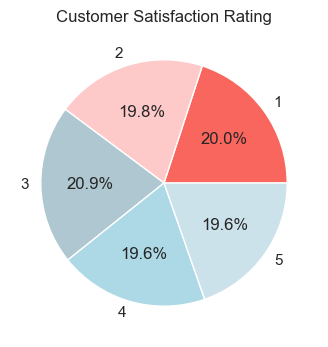

In [72]:
graph_satisfaction = data['Customer_Satisfaction_Rating'].value_counts().sort_index()
plt.figure(figsize = (6,4))
plt.pie(graph_satisfaction, labels = graph_satisfaction.index, autopct='%.1f%%', colors=['#f9665e', '#fec9c9', '#afc7d0', '#add8e6', '#cce2eb'])
plt.title('Customer Satisfaction Rating', loc = 'center', pad = 5, size = 12)
plt.show()

In [73]:
# The customer satisfaction rating as an identical distribution among the 5 levels.
# Customer satisfaction of 1, meaning a lowest level of satisfaction, has the second highest number of tickets (20.0%).
# Customer satisfaction of 3, meaning a medium level of satisfaction, has the highest number of tickets (20.9%).
# Customer satisfaction of 5, meaning a highest level of satisfaction, has the lowest number of tickets (19.6%).

### Step 9: Data Transformation

In [74]:
# Standardization of numerical variables (Z-Score Normalization), so we can compare them on a similar scale.
# All numerical variables will be transform taking into account a standard normal distribution with a mean of 0 and a standard deviation of 1.
# After Standardization, convert the numpy array into a pandas dataframe, so we can apply then in bivariate / multivariate analysis.

In [75]:
scaling = StandardScaler()

In [76]:
scale_numerical_columns=scaling.fit_transform(numerical_columns)
print(scale_numerical_columns)

[[ 0.2413194   0.00616123]
 [-1.14091878  0.00616123]
 [ 1.49191586 -1.41554359]
 ...
 [ 0.6362446  -1.41554359]
 [ 0.8337072   0.00616123]
 [ 0.6362446   0.00616123]]


In [77]:
scale_numerical_columns = pd.DataFrame(scale_numerical_columns, columns=['Customer_Age', 'Customer_Satisfaction_Rating'])

### Step 10: EDA Bivariate Analysis

In [78]:
# Convert categorical columns to numerical ones, so we can compare them with numerical columns.
# This way, we can do the bar graphs - Ticket Subject and Ticket Type Vs Ticket Priority and the Heatmap.

In [79]:
data['Ticket_Priority_Fact'] = pd.factorize(data['Ticket_Priority'])[0] 
data['Customer_Gender_Fact'] = pd.factorize(data['Customer_Gender'])[0] 
data['Brand_Fact'] = pd.factorize(data['Brand'])[0] 
data['Product_Purchased_Fact'] = pd.factorize(data['Product_Purchased'])[0] 
data['Ticket_Type_Fact'] = pd.factorize(data['Ticket_Type'])[0] 
data['Ticket_Subject_Fact'] = pd.factorize(data['Ticket_Subject'])[0] 

In [80]:
print(data['Ticket_Priority_Fact'])

0       0
1       0
2       0
3       1
4       1
       ..
2764    2
2765    1
2766    1
2767    1
2768    3
Name: Ticket_Priority_Fact, Length: 2769, dtype: int64


In [81]:
# Create a new column called 'Customer_Age_Bin' to set ages in ≈ 10 year groups.

In [82]:
age = []
for i in data['Customer_Age']:
    if i<=20:
        age.append('15-20')
    elif 20<i<=30:
        age.append('21-30')
    elif 30<i<=40:
        age.append('31-40')
    elif 40<i<=50:
        age.append('41-50')
    elif 50<i<=60:
        age.append('51-60')
    elif 60<i<=70:
        age.append('61-70')
    else:
        age.append(' ')
data['Customer_Age_Bin'] = age

In [83]:
data.head()

,Customer_Age,Customer_Gender,Brand,Product_Purchased,Ticket_Type,Ticket_Subject,Resolution,Ticket_Priority,Ticket_Channel,First Response Time,Time to Resolution,Customer_Satisfaction_Rating,Ticket_Priority_Fact,Customer_Gender_Fact,Brand_Fact,Product_Purchased_Fact,Ticket_Type_Fact,Ticket_Subject_Fact,Customer_Age_Bin
0,48,Other,Dell,Dell XPS,Technical issue,Network problem,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3,0,0,0,0,0,0,41-50
1,27,Female,Microsoft,Microsoft Office,Billing inquiry,Account access,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3,0,1,1,1,1,1,21-30
2,67,Female,Autodesk,Autodesk AutoCAD,Billing inquiry,Data loss,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1,0,1,2,2,1,2,61-70
3,48,Male,Nintendo,Nintendo Switch,Cancellation request,Data loss,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1,1,2,3,3,2,2,41-50
4,51,Male,Microsoft,Microsoft Xbox Controller,Product inquiry,Software bug,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1,1,2,1,4,3,3,51-60


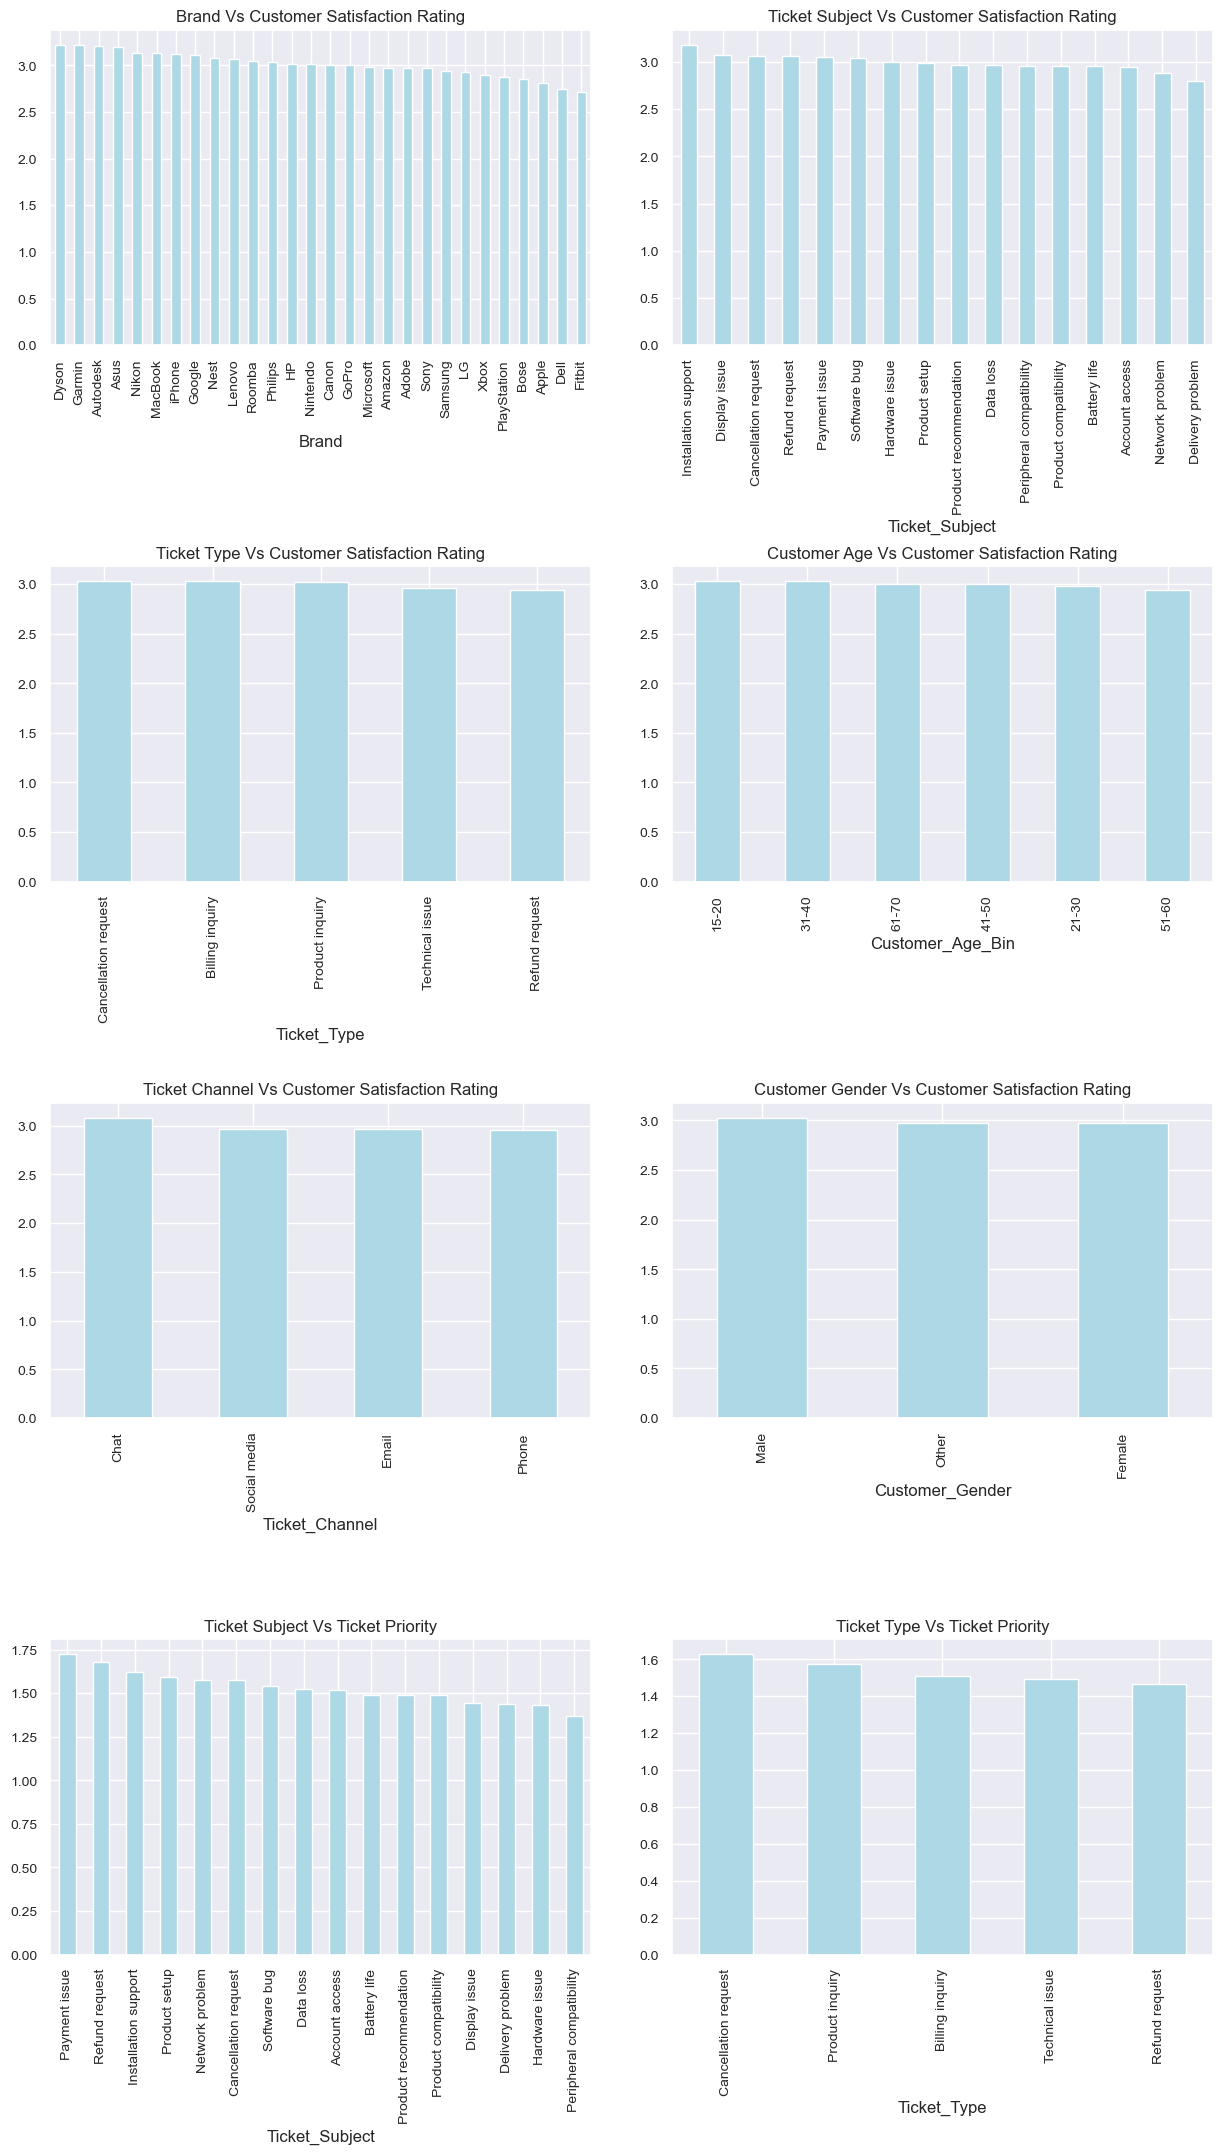

In [84]:
fig, axarr = plt.subplots(4, 2, figsize=(15, 25))
data.groupby('Brand')['Customer_Satisfaction_Rating'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], color = '#add8e6', fontsize=10)
axarr[0][0].set_title("Brand Vs Customer Satisfaction Rating", fontsize=12)
data.groupby('Ticket_Subject')['Customer_Satisfaction_Rating'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], color = '#add8e6', fontsize=10)
axarr[0][1].set_title("Ticket Subject Vs Customer Satisfaction Rating", fontsize=12)
data.groupby('Ticket_Type')['Customer_Satisfaction_Rating'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], color = '#add8e6', fontsize=10)
axarr[1][0].set_title("Ticket Type Vs Customer Satisfaction Rating", fontsize=12)
data.groupby('Customer_Age_Bin')['Customer_Satisfaction_Rating'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], color = '#add8e6', fontsize=10)
axarr[1][1].set_title("Customer Age Vs Customer Satisfaction Rating", fontsize=12)
data.groupby('Ticket_Channel')['Customer_Satisfaction_Rating'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], color = '#add8e6', fontsize=10)
axarr[2][0].set_title("Ticket Channel Vs Customer Satisfaction Rating", fontsize=12)
data.groupby('Customer_Gender')['Customer_Satisfaction_Rating'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], color = '#add8e6', fontsize=10)
axarr[2][1].set_title("Customer Gender Vs Customer Satisfaction Rating", fontsize=12)
data.groupby('Ticket_Subject')['Ticket_Priority_Fact'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], color = '#add8e6', fontsize=10)
axarr[3][0].set_title("Ticket Subject Vs Ticket Priority", fontsize=12)
data.groupby('Ticket_Type')['Ticket_Priority_Fact'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], color = '#add8e6', fontsize=10)
axarr[3][1].set_title("Ticket Type Vs Ticket Priority", fontsize=12)  
plt.subplots_adjust(hspace=0.70)
plt.subplots_adjust(wspace=.15)

In [85]:
# The top 3 brands with the highest mean customer satisfaction are Dyson, Garmin and Autodesk.
# The top 3 brands with the lowest mean customer satisfaction are Fitbit, Dell and Apple.

# The top 3 subjects with the highest mean customer satisfaction are Installation support, Display issue, Cancellation request.
# The top 3 subjects with the lowest mean customer satisfaction are Account access, Network problem and Delivery problem.

# The top 2 tickets type with the highest mean customer satisfaction are Cancellation request and Billing inquiry.
# The top 2 tickets type with the lowest mean customer satisfaction are Technical issue and Refund request.

# The top 2 age groups with the highest mean customer satisfaction are 15-20 and 31-40 years old.
# The top 2 age groups with the lowest mean customer satisfaction are 21-30 and 51-60 year old.

# The top 1 channel with the highest mean customer satisfaction is Chat.
# The top 1 channel with the lowest mean customer satisfaction is Phone.

# The top 1 gender with the highest mean customer satisfaction is Male.
# The top 1 gender with the lowest mean customer satisfaction is Female.

# The top 3 tickets subject with the mean highest ticket priority are Payment issue, Refund request and Installation support.
# The top 3 tickets subject with the mean lowest ticket priority are Delivery problem, Hardware issue and Peripheral compatibility.

# The top 1 ticket type with the highest mean ticket priority is Cancellation request.
# The top 1 ticket type with the lowest mean ticket priority is Refund request.

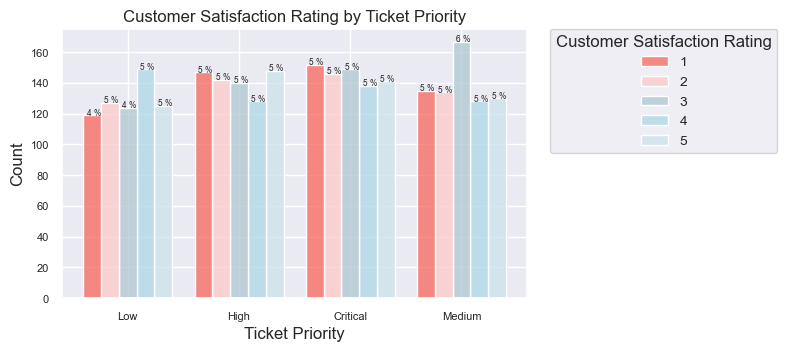

In [86]:
color_dict_1 = dict({1.0:'#f9665e', 
                  2.0:'#fec9c9',
                  3.0:'#afc7d0', 
                  4.0:'#add8e6', 
                  5.0:'#cce2eb'})

sns.set_theme(style='darkgrid')
plt.figure(figsize = (6, 3.5))
ax=sns.histplot(data=data, x = 'Ticket_Priority', hue = 'Customer_Satisfaction_Rating', multiple = 'dodge', shrink = 0.8, palette = color_dict_1)
plt.title('Customer Satisfaction Rating by Ticket Priority', loc = 'center', pad =5, size = 12)
sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Customer Satisfaction Rating", fontsize=10)
plt.xlabel('Ticket Priority')
plt.tick_params(axis='both', labelsize=8)
for p in ax.patches:
    percentage = '{:.0f} %'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=6, ha='right')
plt.show()

In [87]:
# When the priority is Critical or High, the customer satisfaction rating is very homogeneous (all around 5%).
# When the priority is Medium, the customer satisfaction rating varies from 6% (satisfaction level 3) to 5% (all the other levels).
# When the priority is Low, the satisfaction level 1 has the lowest percentage (4%).

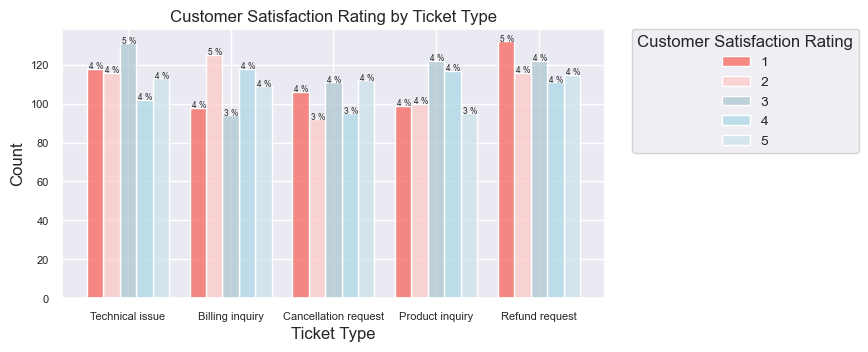

In [88]:
color_dict_1 = dict({1.0:'#f9665e', 
                  2.0:'#fec9c9',
                  3.0:'#afc7d0', 
                  4.0:'#add8e6', 
                  5.0:'#cce2eb'})

sns.set_theme(style='darkgrid')
plt.figure(figsize = (7, 3.5))
ax=sns.histplot(data=data, x = 'Ticket_Type', hue = 'Customer_Satisfaction_Rating', multiple = 'dodge', shrink = 0.8, palette = color_dict_1)
plt.title('Customer Satisfaction Rating by Ticket Type', loc = 'center', pad =5, size = 12)
sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Customer Satisfaction Rating", fontsize=10)
plt.xlabel('Ticket Type')
plt.tick_params(axis='both', labelsize=8)
for p in ax.patches:
    percentage = '{:.0f} %'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=6, ha='right')
plt.show()

In [89]:
# When the ticket type is Refund request, the customer satisfaction rating with the highest number is level 1 - Low (5%).
# In all the other ticket types, the lowest customer satisfaction rating of 1 is 4%.
# The highest customer satisfaction rating of 5 is 4% in all ticket types, except for Product inquiry, which is 3%.

### Step 11: EDA Multivariate Analysis

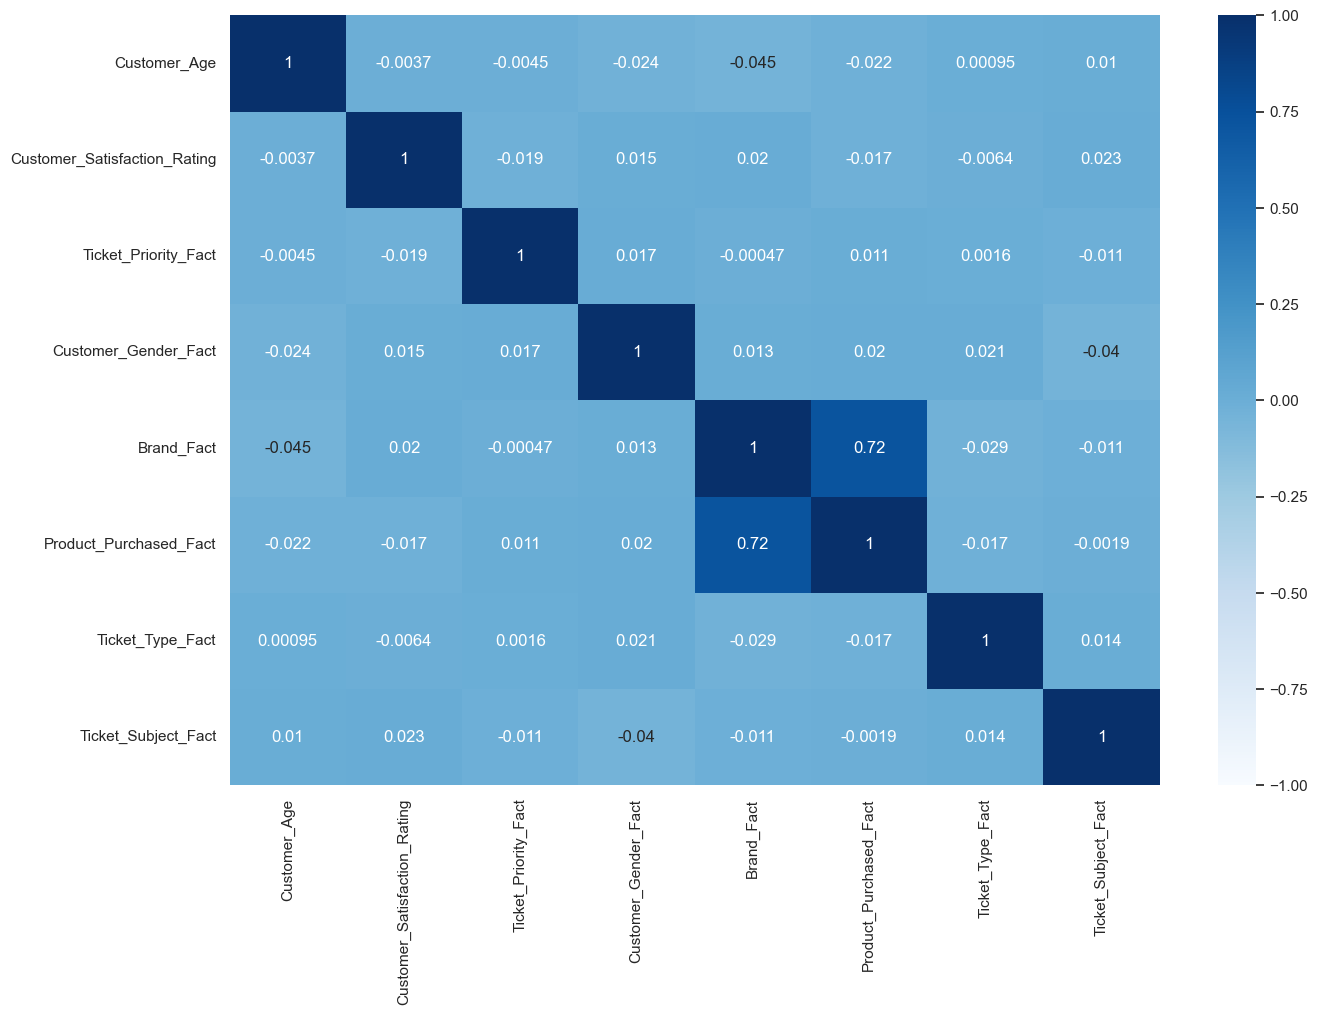

In [90]:
plt.figure(figsize=(15, 10))
sns.heatmap((data).corr(), annot = True, vmin = -1, vmax = 1, cmap="Blues")
plt.show()

In [91]:
# Correlating all variables, we can infer the follwing:
  # Brand has the one of the highest correlations with Product Purchased, as Brand was extracted from Product Purchased.
  # All the other variables do not show a straight correlation between each other.